## Portafolio 2: Uso de framework o biblioteca de aprendizaje automático para la implementación de una solución

**Por:** Fernando Bustos Monsiváis - A00829931

**Bloque:** TC3006C.102 - Inteligencia artificial avanzada para la ciencia de datos I

**Módulo 2:** Machine Learning

**Profesor:** MSc Jesús Adrián Rodríguez Rocha

**Fecha de creación:** Martes 03 de septiembre de 2024 a las 11:15 a.m.

**Fecha de última modificación:** Sábado 07 de septiembre de 2024 a las 04:45 p.m.

### Neural Network sin Técnicas de Regularización

In [22]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical

# Cargar el dataset de MNIST (imágenes de dígitos escritos a mano)
# El set se divide en datos de training y test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los valores de las imágenes para que estén en el rango [0, 1]
# Esto ayuda a que el modelo entrene de manera más eficiente
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Expandir la dimensión de las imágenes para que tengan la forma (28, 28, 1)
# Esto es necesario para que Keras pueda procesar las imágenes como datos 2D (grises)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convertir las etiquetas a una representación one-hot
# Cada dígito (0-9) se convierte en un vector de 10 elementos, con un 1 en la posición correspondiente al dígito
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear un modelo secuencial
model = models.Sequential()

# Añadir una capa de entrada con la forma de las imágenes (28x28x1, escala de grises)
model.add(layers.Input(shape=(28, 28, 1)))

# Primera capa convolucional con 32 filtros 3x3 y activación 'relu'
# Esto extrae características locales de las imágenes
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Añadir una capa de max-pooling 2x2, que reduce la dimensionalidad de las imágenes
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional con 64 filtros 3x3 y activación 'relu'
# Extrae características más complejas de las imágenes
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Segunda capa de max-pooling 2x2 para reducir aún más la dimensionalidad
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar los datos 2D para convertirlos en un vector 1D, antes de pasarlos a capas densas
model.add(layers.Flatten())

# Añadir una capa densa con 64 neuronas y activación 'relu'
# Esta capa procesa las características extraídas por las capas convolucionales
model.add(layers.Dense(64, activation='relu'))

# Añadir la capa de salida con 10 neuronas (una por cada dígito) y activación 'softmax'
# Softmax convierte los resultados en probabilidades para las 10 clases (0-9)
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo con el optimizador 'adam', la función de pérdida 'categorical_crossentropy'
# y la métrica de precisión 'accuracy'
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con los datos de training
# Usar el 20% del training set para validación
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluar el modelo en el test set
test_loss, test_acc = model.evaluate(x_test, y_test)

# Imprimir la precisión (accuracy) del modelo en el test set
print(f"Test Accuracy: {round(test_acc * 100, 2)}%")

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8228 - loss: 0.6090 - val_accuracy: 0.9724 - val_loss: 0.0911
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9760 - loss: 0.0781 - val_accuracy: 0.9822 - val_loss: 0.0609
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9834 - loss: 0.0542 - val_accuracy: 0.9833 - val_loss: 0.0565
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9873 - loss: 0.0406 - val_accuracy: 0.9870 - val_loss: 0.0476
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9897 - loss: 0.0335 - val_accuracy: 0.9872 - val_loss: 0.0444
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9918 - loss: 0.0259 - val_accuracy: 0.9876 - val_loss: 0.0425
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9941 - loss: 0.0208 - val_accuracy: 0.9876 - val_loss: 0.0434
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accu

### Learning Curve (Sin Regularización)

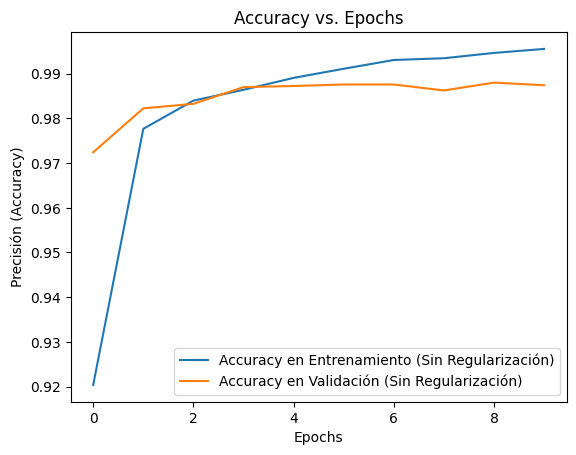

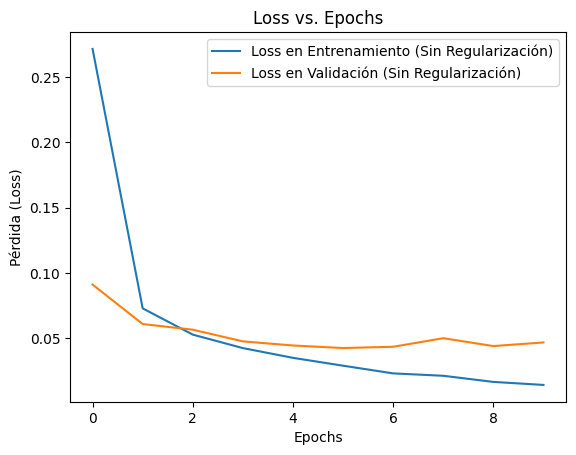

In [30]:
# Graficar la precisión en entrenamiento y validación
plt.plot(history.history['accuracy'], label='Accuracy en Entrenamiento (Sin Regularización)')
plt.plot(history.history['val_accuracy'], label='Accuracy en Validación (Sin Regularización)')
plt.xlabel('Epochs')
plt.ylabel('Precisión (Accuracy)')
plt.legend()
plt.title('Accuracy vs. Epochs')
plt.show()

# Graficar la pérdida en entrenamiento y validación
plt.plot(history.history['loss'], label='Loss en Entrenamiento (Sin Regularización)')
plt.plot(history.history['val_loss'], label='Loss en Validación (Sin Regularización)')
plt.xlabel('Epochs')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.title('Loss vs. Epochs')
plt.show()

### Predicciones

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


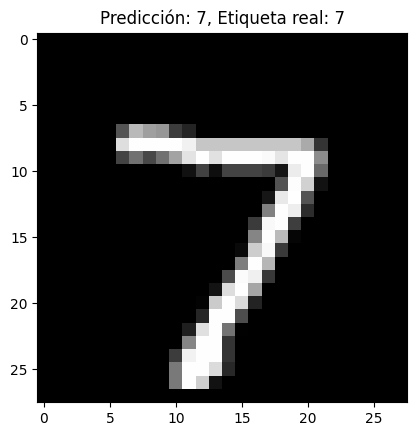

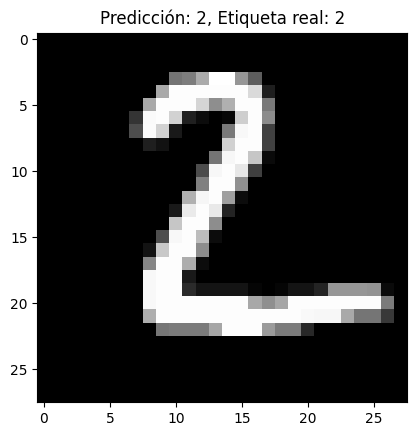

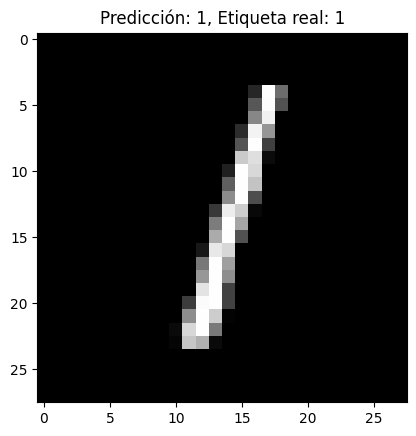

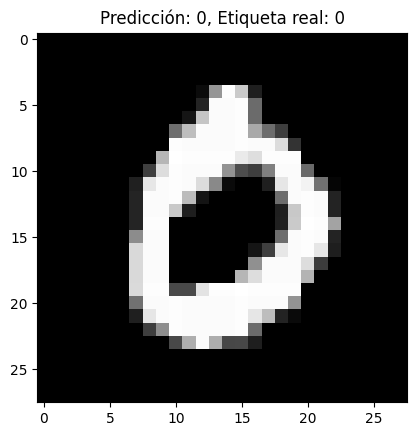

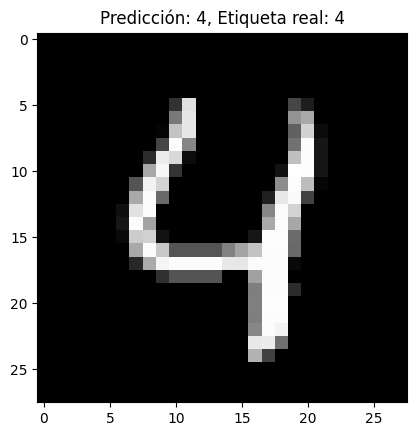

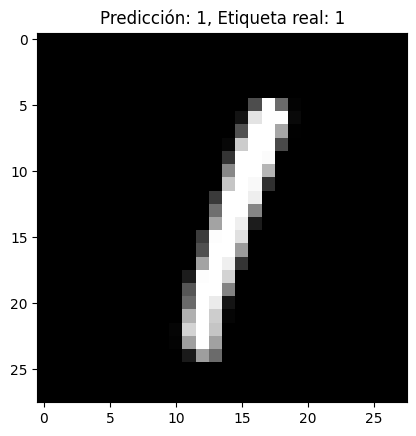

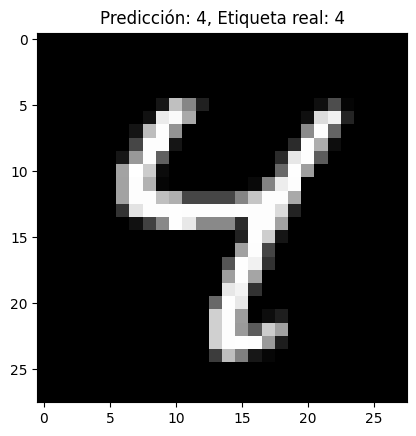

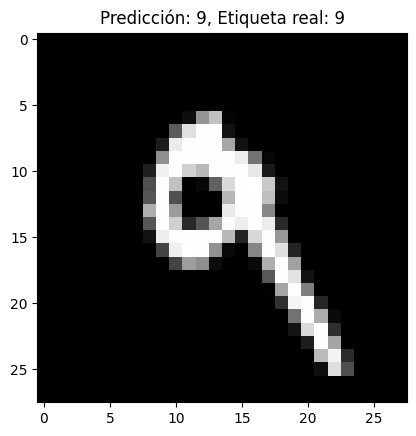

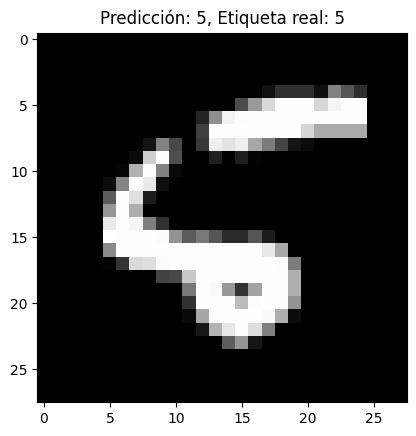

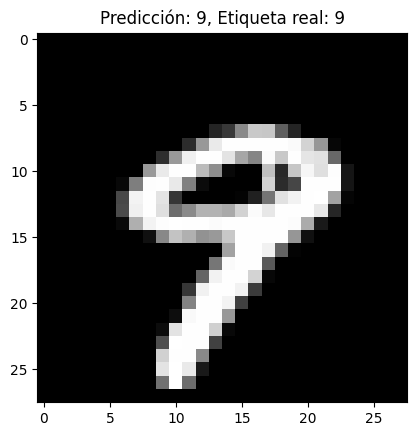

In [24]:
# Hacer predicciones en el test set
predicciones = model.predict(x_test)

# Convertir las predicciones de probabilidades a etiquetas (índices con la clase más probable)
predicciones_clases = np.argmax(predicciones, axis=1)

# Las etiquetas verdaderas de prueba también deben ser convertidas de one-hot a su formato original
etiquetas_verdaderas = np.argmax(y_test, axis=1)

# Imprimir 10 predicciones junto con las etiquetas verdaderas
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray') # Mostrar las primeras 10 imágenes
    plt.title(f'Predicción: {predicciones_clases[i]}, Etiqueta real: {etiquetas_verdaderas[i]}')
    plt.show()

### Neural Network con Técnicas de Regularización (Dropout, Batch Normalization y Callbacks: Early Stopping)

In [25]:
# Importar EarlyStopping para detener el entrenamiento si no mejora
from keras.callbacks import EarlyStopping

# Crear el modelo con regularización
model_regularized = models.Sequential()

# Capa de entrada
model_regularized.add(layers.Input(shape=(28, 28, 1)))

# Primera capa convolucional con Batch Normalization y Dropout
model_regularized.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_regularized.add(layers.BatchNormalization())
model_regularized.add(layers.MaxPooling2D((2, 2)))
model_regularized.add(layers.Dropout(0.25)) # Apagar 25% de neuronas aleatoriamente

# Segunda capa convolucional con Batch Normalization y Dropout
model_regularized.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_regularized.add(layers.BatchNormalization())
model_regularized.add(layers.MaxPooling2D((2, 2)))
model_regularized.add(layers.Dropout(0.25)) # Apagar 25% de neuronas aleatoriamente

# Capa de aplanamiento
model_regularized.add(layers.Flatten())

# Capa completamente conectada con Dropout y Batch Normalization
model_regularized.add(layers.Dense(64, activation='relu'))
model_regularized.add(layers.BatchNormalization())
model_regularized.add(layers.Dropout(0.5)) # Apagar 50% de neuronas en la capa densa

# Capa de salida con softmax para clasificación de 10 dígitos
model_regularized.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model_regularized.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping para detener el entrenamiento si no mejora después de 3 épocas consecutivas
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo con regularización
history_regularized = model_regularized.fit(
    x_train, y_train, 
    epochs=20, # Más epochs, EarlyStopping detendrá si no mejora
    batch_size=128, 
    validation_split=0.2,
    callbacks=[early_stopping] # Incluir EarlyStopping
)

# Evaluar el modelo en el test set
test_loss_regularized, test_acc_regularized = model_regularized.evaluate(x_test, y_test)
print(f"Test Accuracy (Modelo Regularizado): {round(test_acc_regularized * 100, 2)}%")

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8020 - loss: 0.6510 - val_accuracy: 0.2434 - val_loss: 2.6157
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9638 - loss: 0.1244 - val_accuracy: 0.9762 - val_loss: 0.0796
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9713 - loss: 0.0957 - val_accuracy: 0.9869 - val_loss: 0.0429
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9784 - loss: 0.0742 - val_accuracy: 0.9863 - val_loss: 0.0451
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9788 - loss: 0.0723 - val_accuracy: 0.9898 - val_loss: 0.0355
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9807 - loss: 0.0626 - val_accuracy: 0.9895 - val_loss: 0.0364
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9827 - loss: 0.0568 - val_accuracy: 0.9896 - val_loss: 0.0371
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9839 - loss: 0.0522 - val_acc

### Learning Curve (Regularizado)

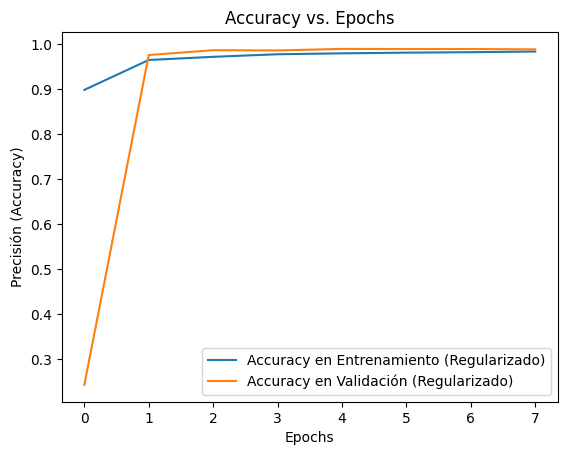

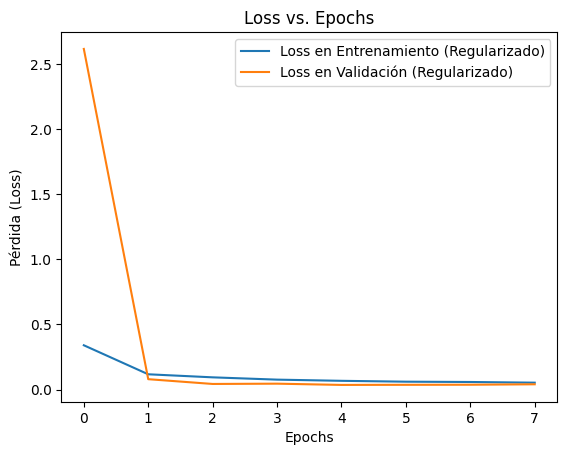

In [32]:
# Graficar precisión (accuracy) para el modelo con regularización
plt.plot(history_regularized.history['accuracy'], label='Accuracy en Entrenamiento (Regularizado)')
plt.plot(history_regularized.history['val_accuracy'], label='Accuracy en Validación (Regularizado)')
plt.xlabel('Epochs')
plt.ylabel('Precisión (Accuracy)')
plt.legend()
plt.title('Accuracy vs. Epochs')
plt.show()

# Graficar pérdida (loss) para el modelo con regularización
plt.plot(history_regularized.history['loss'], label='Loss en Entrenamiento (Regularizado)')
plt.plot(history_regularized.history['val_loss'], label='Loss en Validación (Regularizado)')
plt.xlabel('Epochs')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.title('Loss vs. Epochs')
plt.show()

### Gráficos comparativos del desempeño del modelo antes y después de la técnicas de regularización

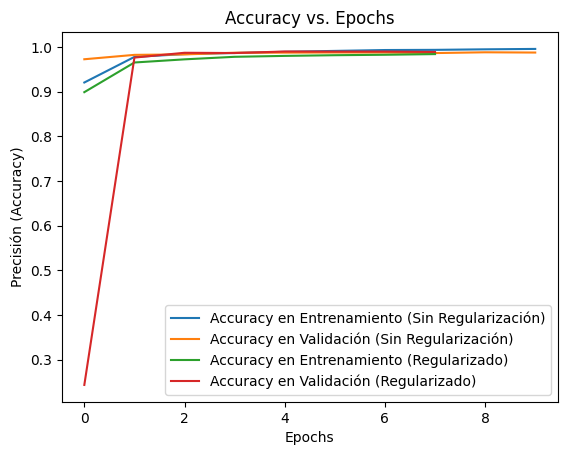

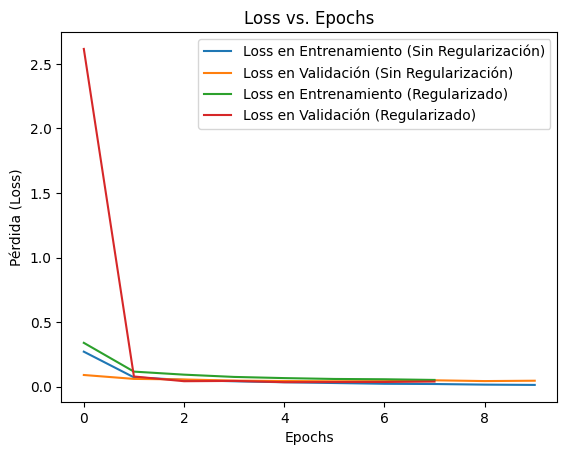

In [29]:
# Graficar precisión (accuracy) para el modelo sin regularización
plt.plot(history.history['accuracy'], label='Accuracy en Entrenamiento (Sin Regularización)')
plt.plot(history.history['val_accuracy'], label='Accuracy en Validación (Sin Regularización)')

# Graficar precisión (accuracy) para el modelo con regularización
plt.plot(history_regularized.history['accuracy'], label='Accuracy en Entrenamiento (Regularizado)')
plt.plot(history_regularized.history['val_accuracy'], label='Accuracy en Validación (Regularizado)')

plt.xlabel('Epochs')
plt.ylabel('Precisión (Accuracy)')
plt.legend()
plt.title('Accuracy vs. Epochs')
plt.show()

# Graficar pérdida (loss) para el modelo sin regularización
plt.plot(history.history['loss'], label='Loss en Entrenamiento (Sin Regularización)')
plt.plot(history.history['val_loss'], label='Loss en Validación (Sin Regularización)')

# Graficar pérdida (loss) para el modelo con regularización
plt.plot(history_regularized.history['loss'], label='Loss en Entrenamiento (Regularizado)')
plt.plot(history_regularized.history['val_loss'], label='Loss en Validación (Regularizado)')

plt.xlabel('Epochs')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.title('Loss vs. Epochs')
plt.show()